# We are doing all of the Data Cleaning, Filling, Normalization Here.

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Imputer

import warnings
warnings.filterwarnings('ignore')

In [136]:
origin_data = pd.read_csv('./Data/ks-projects-201801.csv',index_col=[0])

data = origin_data.copy()
#In this project, we ignore the title's factor to the successful rate. 
data.drop("name",inplace=True, axis=1)

#We only consider the projects are completed. 
data = data[data.state != "live"]

#There are many other states like failed, suspended, we consider them as failed.
data.state = data.state == "successful"

In [137]:
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,
1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,GB,0.0,0.0,1533.95
1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,US,100.0,2421.0,30000.00
1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,US,220.0,220.0,45000.00
1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,US,1.0,1.0,5000.00
1000011046,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,False,14,US,1283.0,1283.0,19500.00


In [138]:
data.deadline = pd.to_datetime(data.deadline)
data.launched = pd.to_datetime(data.launched)

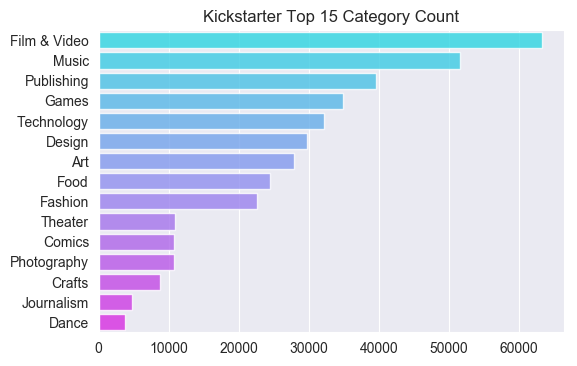

In [139]:
sns.set_style('darkgrid')
mains =data.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="cool", alpha=0.8)

plt.title('Kickstarter Top 15 Category Count')
plt.show()

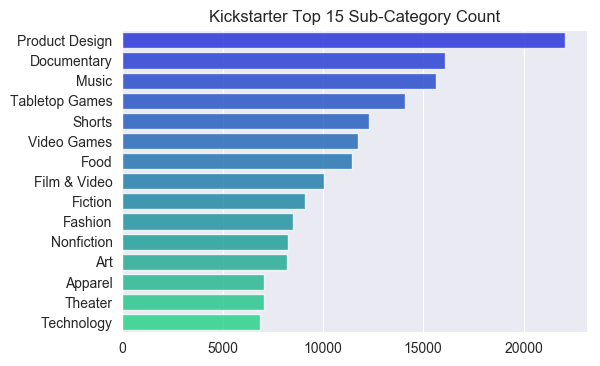

In [141]:
cats = data.category.value_counts().head(15)

x = cats.values
y = cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="winter", alpha=0.8)

plt.title('Kickstarter Top 15 Sub-Category Count')
plt.show()

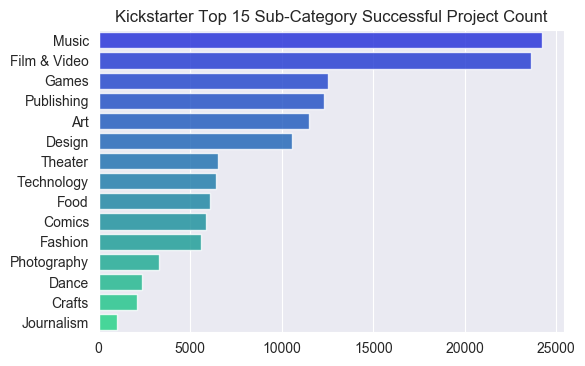

In [144]:
successful_data = data[data.state == 1]
suc_cats = successful_data.main_category.value_counts().head(15)

x = suc_cats.values
y = suc_cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="winter", alpha=0.8)

plt.title('Kickstarter Top 15 Sub-Category Successful Project Count')
plt.show()

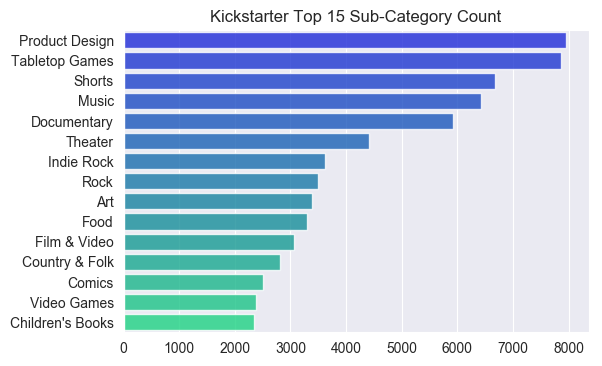

In [143]:
successful_data = data[data.state == 1]
suc_cats = successful_data.category.value_counts().head(15)

x = suc_cats.values
y = suc_cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="winter", alpha=0.8)

plt.title('Kickstarter Top 15 Sub-Category Successful Project Count')
plt.show()

# Basic Stat Analysis

In [93]:
print("Total Number of Completed Projects:", len(data),"\n"
      "Total Number of Successful Projects:", len(data[data.state == 1]),"\n"
      "Successful Rate Among All projects:",str(round(len(data[data.state == 1])/len(data)* 100,2)) + "%\n"
      "Number of Catagories: Main catagories num -", len(set(data["main_category"])), "Sub catagories num -", len(set(data["category"])),"\n"
     )

Total Number of Completed Projects: 375862 
Total Number of Successful Projects: 133956 
Successful Rate Among All projects: 35.64%
Number of Catagories: Main catagories num - 15 Sub catagories num - 159 



In [94]:
data.describe()

,category,main_category,currency,goal,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,375862.000000,375862.000000,375862.000000,3.758620e+05,3.758620e+05,375862.000000,375862.000000,3.720660e+05,3.758620e+05,3.758620e+05
mean,80.781667,7.513066,11.009549,4.887465e+04,9.687431e+03,105.896866,18.864344,7.080215e+03,9.082678e+03,4.532720e+04
std,45.088300,3.904079,3.939557,1.176595e+06,9.588649e+04,909.952393,6.261639,7.893105e+04,9.127075e+04,1.145865e+06
min,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,40.000000,5.000000,13.000000,2.000000e+03,3.000000e+01,2.000000,22.000000,1.800000e+01,3.100000e+01,2.000000e+03
50%,87.000000,7.000000,13.000000,5.100000e+03,6.250000e+02,12.000000,22.000000,4.000000e+02,6.274500e+02,5.480000e+03
75%,120.000000,10.000000,13.000000,1.600000e+04,4.090000e+03,56.000000,22.000000,3.056957e+03,4.064463e+03,1.550000e+04
max,158.000000,14.000000,13.000000,1.000000e+08,2.033899e+07,219382.000000,22.000000,2.033899e+07,2.033899e+07,1.663614e+08


### Check for Null data

In [126]:
pd.isna(data).any()
data.fillna(method="bfill",inplace=True)

# Correlation

In [127]:
data.corr()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
category,1.000000,0.199050,-0.012244,0.003316,0.028928,0.022527,0.041134,-0.012834,0.025946,0.029428,0.002602
main_category,0.199050,1.000000,-0.013885,0.003894,0.004888,-0.034920,0.000165,-0.014283,0.006006,0.006106,0.002315
currency,-0.012244,-0.013885,1.000000,-0.005496,0.005802,0.066073,0.012313,0.979507,0.014192,0.011041,-0.003695
goal,0.003316,0.003894,-0.005496,1.000000,0.007339,-0.024483,0.004077,-0.004270,0.005597,0.005172,0.941677
pledged,0.028928,0.004888,0.005802,0.007339,1.000000,0.111850,0.717427,0.006310,0.856305,0.953369,0.005099
state,0.022527,-0.034920,0.066073,-0.024483,0.111850,1.000000,0.129230,0.064518,0.097320,0.110786,-0.023246
backers,0.041134,0.000165,0.012313,0.004077,0.717427,0.129230,1.000000,0.012086,0.697003,0.752489,0.004584
country,-0.012834,-0.014283,0.979507,-0.004270,0.006310,0.064518,0.012086,1.000000,0.013787,0.010889,-0.002975
usd pledged,0.025946,0.006006,0.014192,0.005597,0.856305,0.097320,0.697003,0.013787,1.000000,0.905955,0.006240
usd_pledged_real,0.029428,0.006106,0.011041,0.005172,0.953369,0.110786,0.752489,0.010889,0.905955,1.000000,0.005669


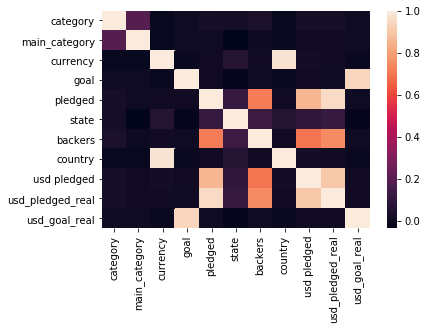

In [131]:
sns.heatmap(data.corr(), 
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)

# Convert Catagorial Data to Numerical

In [147]:
encoders = {}
def encoder(data):
    for col in data.columns:
        if data.dtypes[col] == "object":
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))
            encoders[col] = le
    return data


In [148]:
data = encoder(data)
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,
1000002330,108,12,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,9,0.0,0.0,1533.95
1000003930,93,6,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,22,100.0,2421.0,30000.00
1000004038,93,6,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,22,220.0,220.0,45000.00
1000007540,90,10,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,22,1.0,1.0,5000.00
1000011046,55,6,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,False,14,22,1283.0,1283.0,19500.00
